In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

C:\Users\dell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Importing the dataset

df = pd.read_csv('wine_data.csv', header=None, usecols=[0,1,2])
df.columns=['Class_label', 'Alcohol', 'Malic Acid']
df.sample(5)

,Class_label,Alcohol,Malic Acid
169,3,13.40,4.60
105,2,12.42,2.55
135,3,12.60,2.46
177,3,14.13,4.10
117,2,12.42,1.61


<AxesSubplot:xlabel='Alcohol', ylabel='Malic Acid'>

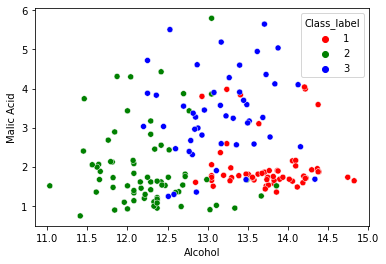

In [5]:
# Define the color mapping
color_dict = {1: 'red', 2: 'green', 3: 'blue'}

# Use seaborn.scatterplot() with x and y as keyword arguments
sns.scatterplot(x='Alcohol', y='Malic Acid', hue='Class_label', palette=color_dict, data=df)

# Train Test Split

It's a good practice to do train test split before normalization

In [6]:
# In this step, first we are importing 'train_test_split' from 'sklearn.model_selection'
# Then, we are spliting our data into two parts 'train (75% of data)' and 'test (25% of data)'


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Class_label', axis=1), df['Class_label'],
                                                   test_size = 0.25, random_state=0)

X_train.shape, X_test.shape

((133, 2), (45, 2))

# Max Absolute Scaler

In [11]:
from sklearn.preprocessing import MaxAbsScaler

# Initialize the MaxAbsScaler
scaler = MaxAbsScaler()

# Fit the scaler to your training data
scaler.fit(X_train)

# Transform (scale) your training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Convert the scaled arrays back to DataFrames with column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [13]:
# Display statistics before scaling
print("Statistics for X_train before scaling:")
print(np.round(X_train.describe(), 1))

Statistics for X_train before scaling:
       Alcohol  Malic Acid
count    133.0       133.0
mean      13.0         2.4
std        0.8         1.1
min       11.0         0.9
25%       12.4         1.6
50%       13.0         1.9
75%       13.6         3.2
max       14.8         5.6


In [14]:
# Display statistics after scaling
print("\nStatistics for X_train_scaled after Max Absolute Scaling:")
print(np.round(X_train_scaled.describe(), 1))


Statistics for X_train_scaled after Max Absolute Scaling:
       Alcohol  Malic Acid
count    133.0       133.0
mean       0.9         0.4
std        0.1         0.2
min        0.7         0.2
25%        0.8         0.3
50%        0.9         0.3
75%        0.9         0.6
max        1.0         1.0


Text(0.5, 1.0, 'After Scaling')

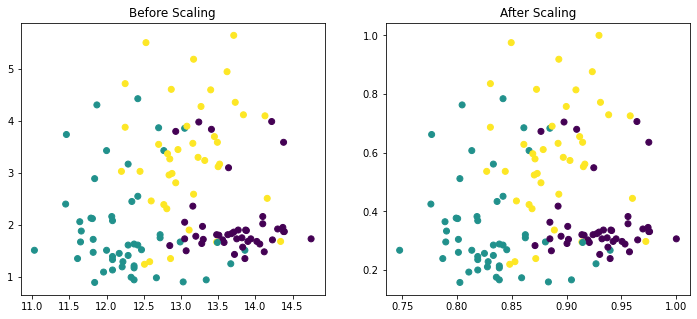

In [15]:
# Graphical illustration of 'X_train' and 'X_train_scaled', 
# Points are almost identical in both graphs, but the values of scale in both graphs have so much difference.
# Now, the data points are squeezed between 0 and 1 of both axis.

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize = (12,5))

ax1.scatter(X_train['Alcohol'], X_train['Malic Acid'], c=y_train)
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic Acid'], c=y_train)
ax2.set_title('After Scaling')